In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import List
from Value import Value
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analise inicial dos dados

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [21]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [22]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [23]:
iris_df.duplicated().sum()

1

In [24]:
iris_df = iris_df.drop_duplicates()

## Análise explorátoria

In [25]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1)

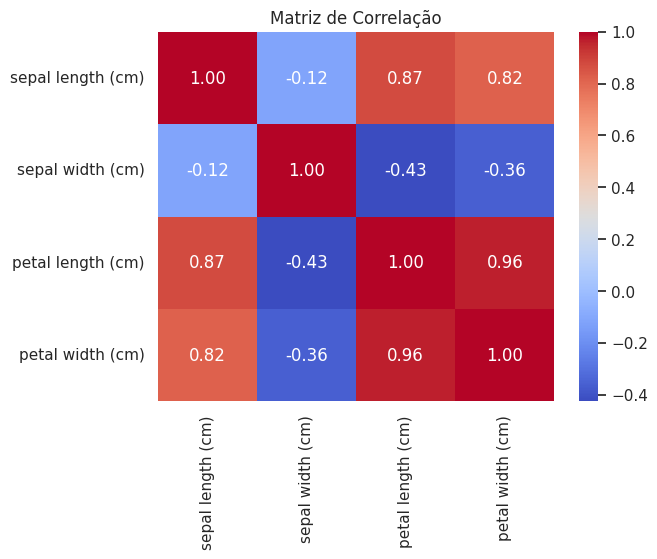

In [27]:
iris_df_x = iris_df.drop(columns='species')
sns.heatmap(iris_df_x.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

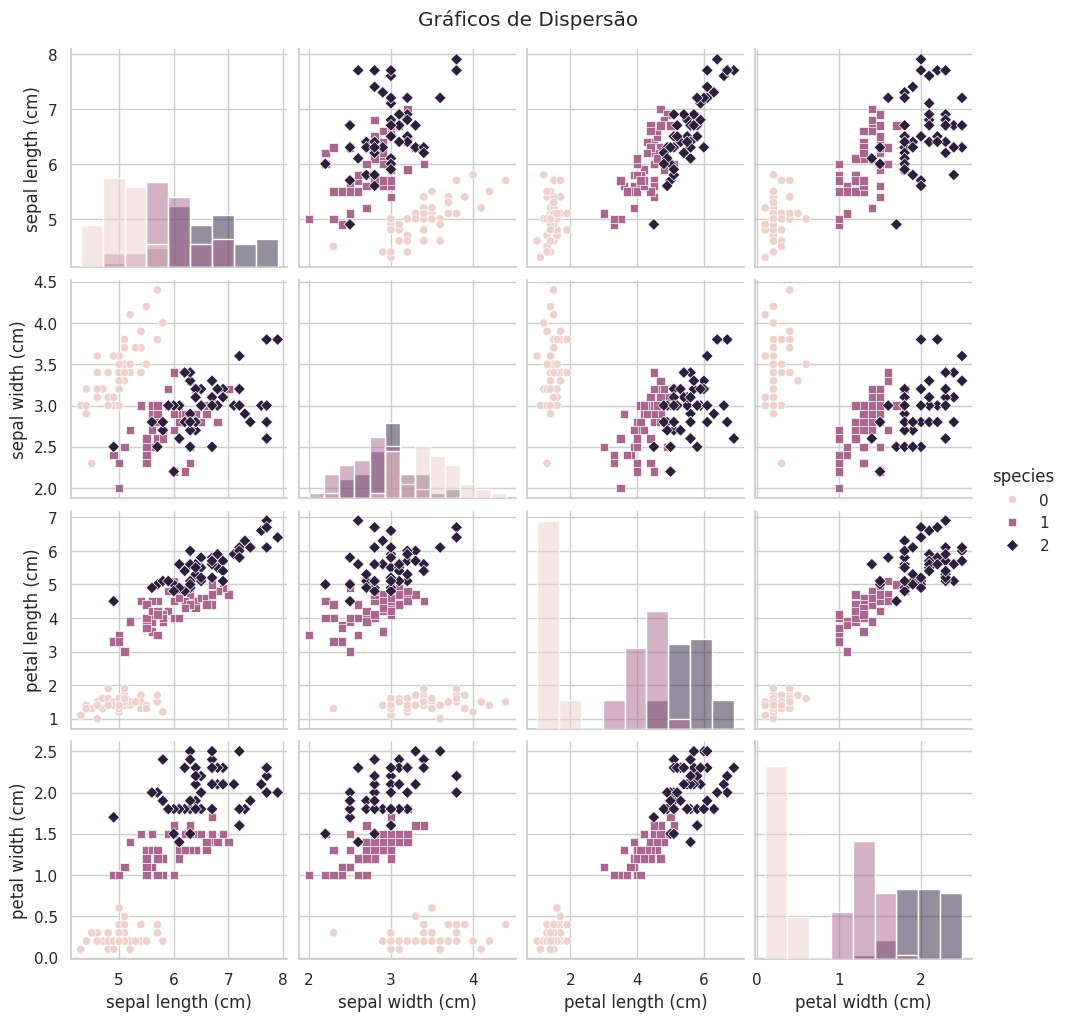

In [28]:
sns.pairplot(iris_df, hue='species', diag_kind='hist', markers=["o", "s", "D"])
plt.suptitle("Gráficos de Dispersão", y=1.02)
plt.show()

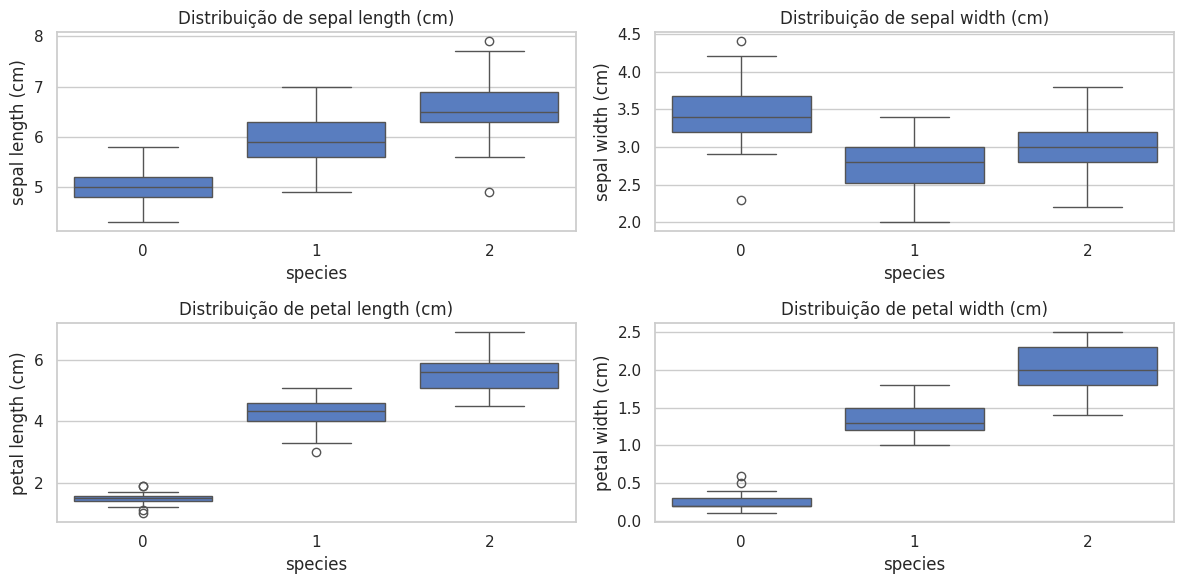

In [29]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f"Distribuição de {feature}")
plt.tight_layout()
plt.show()

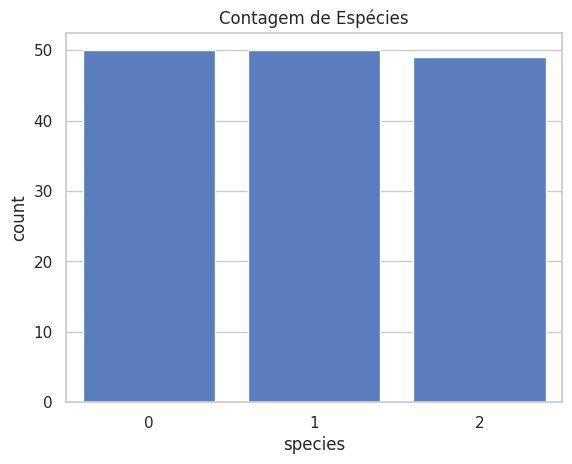

In [30]:
sns.countplot(data=iris_df, x='species')
plt.title("Contagem de Espécies")
plt.show()

## Divisão treino e teste

In [31]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(iris_df_x)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, iris_df['species'], test_size=0.2, random_state=42
)

## Treinamento do modelo

In [32]:
from models import MLP
from nn import sigmoid, softmax, relu
from metrics import mse
from loss import categorical_cross_entropy

In [33]:
model = MLP(4, [10, 5, 1], activation_fn=relu, regression=True)

EPOCHS = 50
LR = 0.05

for epoch in range(EPOCHS):
    y_pred = [model(x) for x in X_train]
    loss = mse(y_train, y_pred)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad

    if epoch % 5 == 0:
        print(f"Epoch {epoch} Loss: {loss.data}")

Epoch 0 Loss: 1.2072073830042696
Epoch 5 Loss: 0.39726874670870665
Epoch 10 Loss: 0.16471183889296565
Epoch 15 Loss: 0.10483378526469946
Epoch 20 Loss: 0.08731057923947855
Epoch 25 Loss: 0.07542027682775981
Epoch 30 Loss: 0.06580793350736358
Epoch 35 Loss: 0.06014328136810857
Epoch 40 Loss: 0.05693203280033043
Epoch 45 Loss: 0.054630056205313686


Final Precision: 0.9694444444444444
Final Recall: 0.9666666666666667
Final F1: 0.9664109121909632


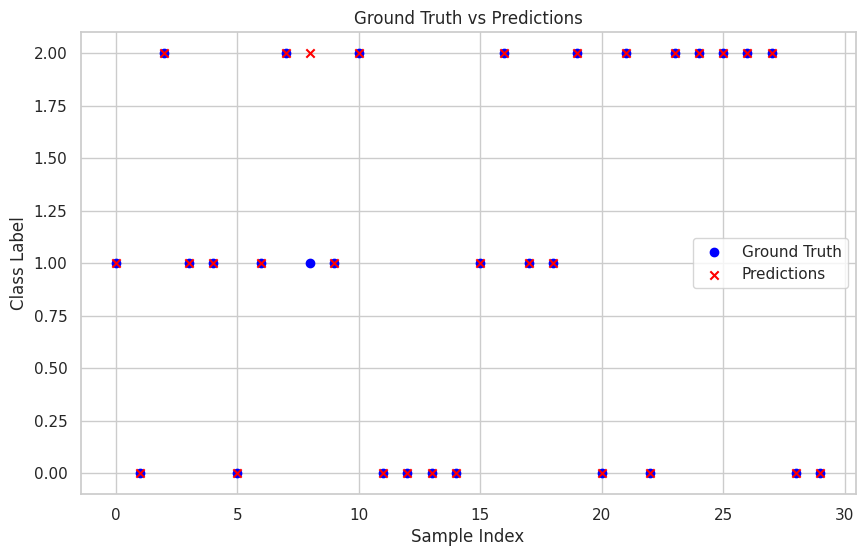

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

y_pred_test = [model(x) for x in X_test]
y_pred_labels = [max(0, min(2, round(value.data))) for value in y_pred_test] 

precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final F1: {f1}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Ground Truth')
plt.scatter(range(len(y_pred_labels)), y_pred_labels, color='red', label='Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Ground Truth vs Predictions')
plt.legend()
plt.show()

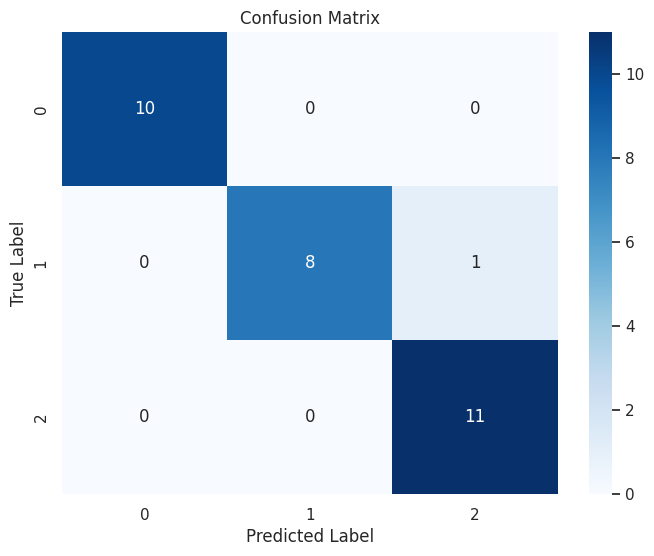

In [35]:
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()